In [1]:
pip install causalnex

You should consider upgrading via the '/Users/megha/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages that might be generated 
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work for you
%matplotlib inline

# Using whitegrid style for our seaborn plots
sns.set_style(style = 'whitegrid')

In [2]:
# To ignore the warnings

import warnings
warnings.filterwarnings("ignore")

# Create an empty Structure Model
from causalnex.structure import StructureModel
sm = StructureModel()

# Structure Learning from Data

In [414]:
import pandas as pd
Collision_data = pd.read_csv('../data_sources/seattle_collisions_merged_from_sdot_wsdot.csv')
Collision_data.columns = map(str.lower, Collision_data.columns)
Collision_data.head(5)

,longitude,latitude,reportno,addrtype,intkey,location,severitycode,severitydesc,collisiontype,personcount,...,tz heavy vehicle crash indicator,tz heavy vehicle crash count,tz vehicle train crash indicator,tz catostrophic event indicator,tz fatal crash indicator,tz fatality count,tz suspected serious injury crash indicator,tz suspected serious injury count,tz pedestrian involved indicator,tz pedacyclist involved indicator
0,-122.328526,47.703180,EA09347,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,1,Property Damage Only Collision,Angles,4,...,0,0,0,0,0,0,0,0,0,0
1,-122.320383,47.539432,3857045,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,1,Property Damage Only Collision,Sideswipe,2,...,0,0,0,0,0,0,0,0,0,0
2,-122.346793,47.662069,EA05985,Block,NaN,N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...,1,Property Damage Only Collision,Unknown,2,...,0,0,0,0,0,0,0,0,0,0
3,-122.351134,47.570942,3856261,Block,NaN,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,1,Property Damage Only Collision,Rear Ended,2,...,0,0,0,0,0,0,0,0,0,0
4,-122.323135,47.540174,E982090,Block,NaN,EAST MARGINAL WAY S BETWEEN CORSON AVE S AND C...,1,Property Damage Only Collision,Unknown,4,...,0,0,0,0,0,0,0,0,0,0


In [415]:
Collision_data_reduced = Collision_data[['addrtype','severitydesc','collisiontype','personcount','pedcount','pedcylcount',
                                         'vehcount','injuries','seriousinjuries','fatalities','junctiontype',
                                         'underinfl','weather_x','roadcond','lightcond','speeding','hitparkedcar'
                                        ]]

Collision_data_reduced.head(10)

,addrtype,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,junctiontype,underinfl,weather_x,roadcond,lightcond,speeding,hitparkedcar
0,Intersection,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,At Intersection (intersection related),N,Raining,Wet,Daylight,Unknown,N
1,Intersection,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,At Intersection (intersection related),N,Overcast,Dry,Daylight,Unknown,N
2,Block,Property Damage Only Collision,Unknown,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Overcast,Wet,Daylight,Unknown,N
3,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Raining,Wet,Dawn,Y,N
4,Block,Property Damage Only Collision,Unknown,4,0,0,4,0,0,0,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,Y,N
5,Block,Property Damage Only Collision,Rear Ended,3,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Overcast,Wet,Daylight,Unknown,N
6,Block,Property Damage Only Collision,Unknown,2,0,0,1,0,0,0,Mid-Block (but intersection related),N,Clear,Wet,Daylight,Y,N
7,Block,Injury Collision,Rear Ended,4,0,0,3,1,0,0,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,Unknown,N
8,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Overcast,Dry,Daylight,Unknown,N
9,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Clear,Wet,Daylight,Unknown,Y


In [416]:
Collision_data_reduced.shape

(157302, 17)

In [417]:
Collision_data_reduced = Collision_data_reduced.drop_duplicates()

In [418]:
Collision_data_reduced.shape


(20949, 17)

In [419]:
#Basic Statistical evaluation to familiarize with the data and some quick observations
Collision_data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in Collision_data_reduced.columns:
    tmp['column'] = [c]
    tmp['values'] = [Collision_data_reduced[c].unique()]
    tmp['values_count_incna'] = len(list(Collision_data_reduced[c].unique()))
    tmp['values_count_nona'] = int(Collision_data_reduced[c].nunique())
    tmp['num_miss'] = Collision_data_reduced[c].isnull().sum()
    tmp['pct_miss'] = (Collision_data_reduced[c].isnull().sum()/ len(Collision_data_reduced)).round(3)*100
    Collision_data_stats = Collision_data_stats.append(tmp)
    
Collision_data_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,addrtype,"[Intersection, Block]",2,2,0,0.0
0,severitydesc,"[Property Damage Only Collision, Injury Collis...",4,4,0,0.0
0,collisiontype,"[Angles, Sideswipe, Unknown, Rear Ended, Parke...",10,10,0,0.0
0,personcount,"[4, 2, 3, 1, 6, 5, 0, 10, 7, 8, 17, 11, 12, 9,...",46,46,0,0.0
0,pedcount,"[0, 1, 2, 3, 4, 5, 6]",7,7,0,0.0
0,pedcylcount,"[0, 1, 2]",3,3,0,0.0
0,vehcount,"[2, 4, 1, 3, 6, 5, 7, 0, 9, 8, 11, 14, 10, 12,...",15,15,0,0.0
0,injuries,"[0, 1, 5, 2, 4, 3, 6, 7, 8, 11, 9, 10, 12, 15,...",16,16,0,0.0
0,seriousinjuries,"[0, 1, 3, 2, 5, 4, 41]",7,7,0,0.0
0,fatalities,"[0, 2, 1, 4, 3, 5]",6,6,0,0.0


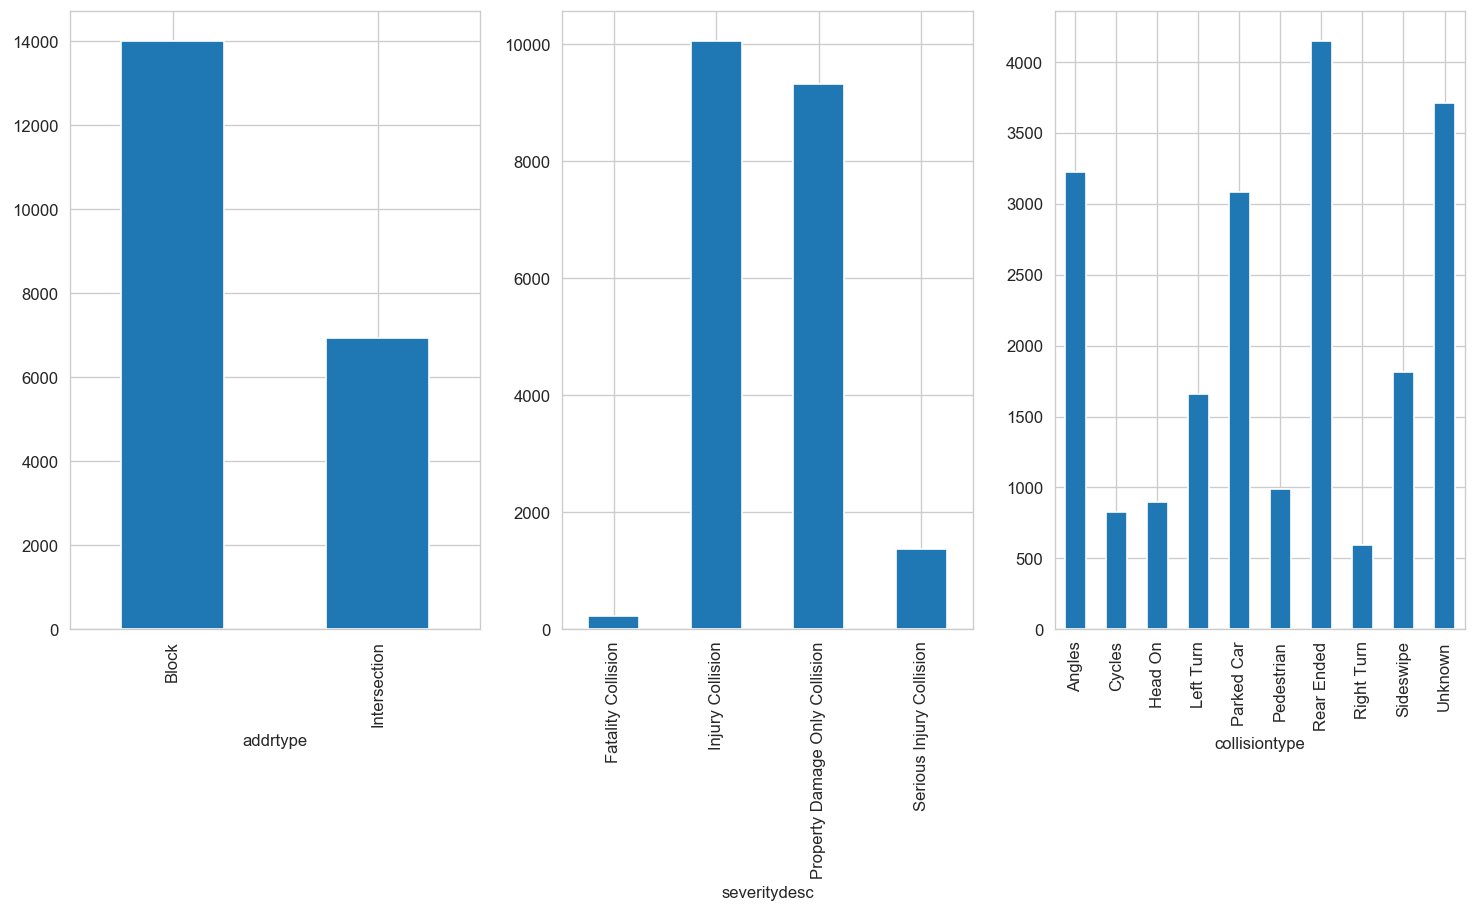

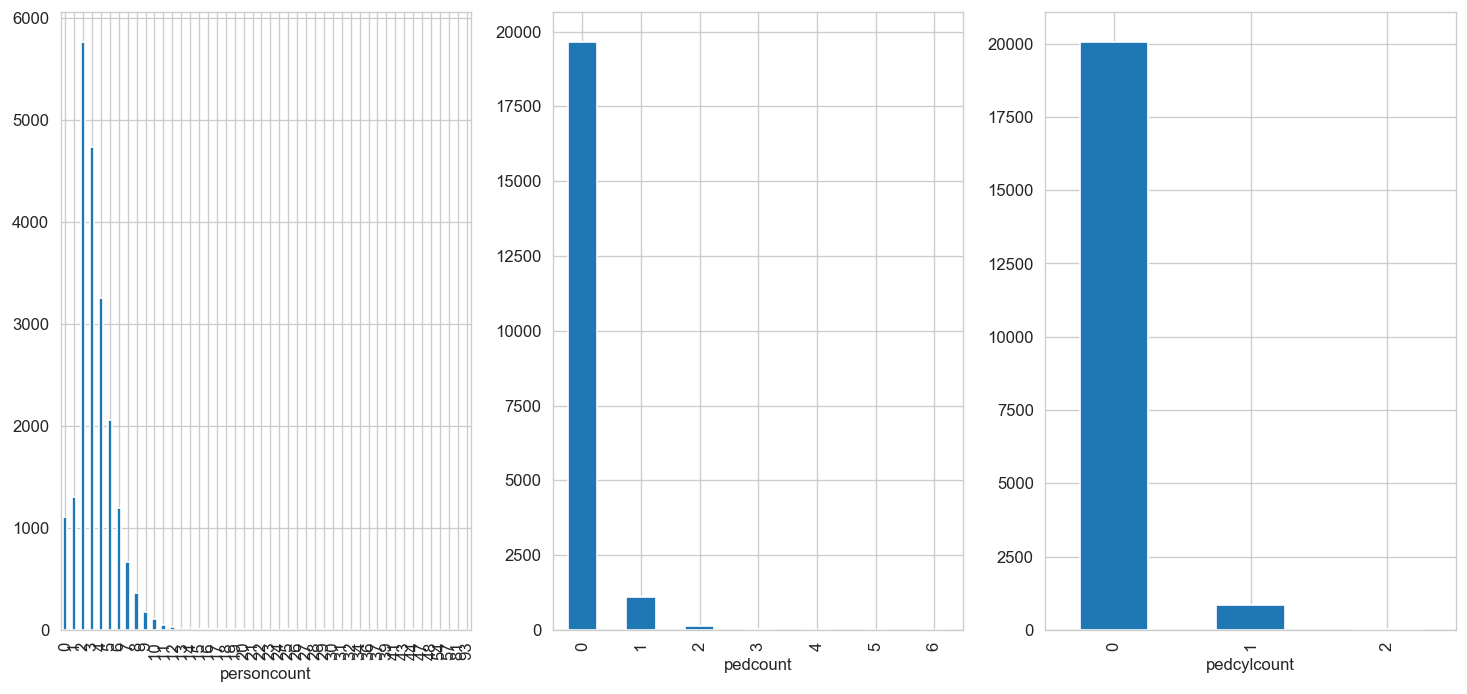

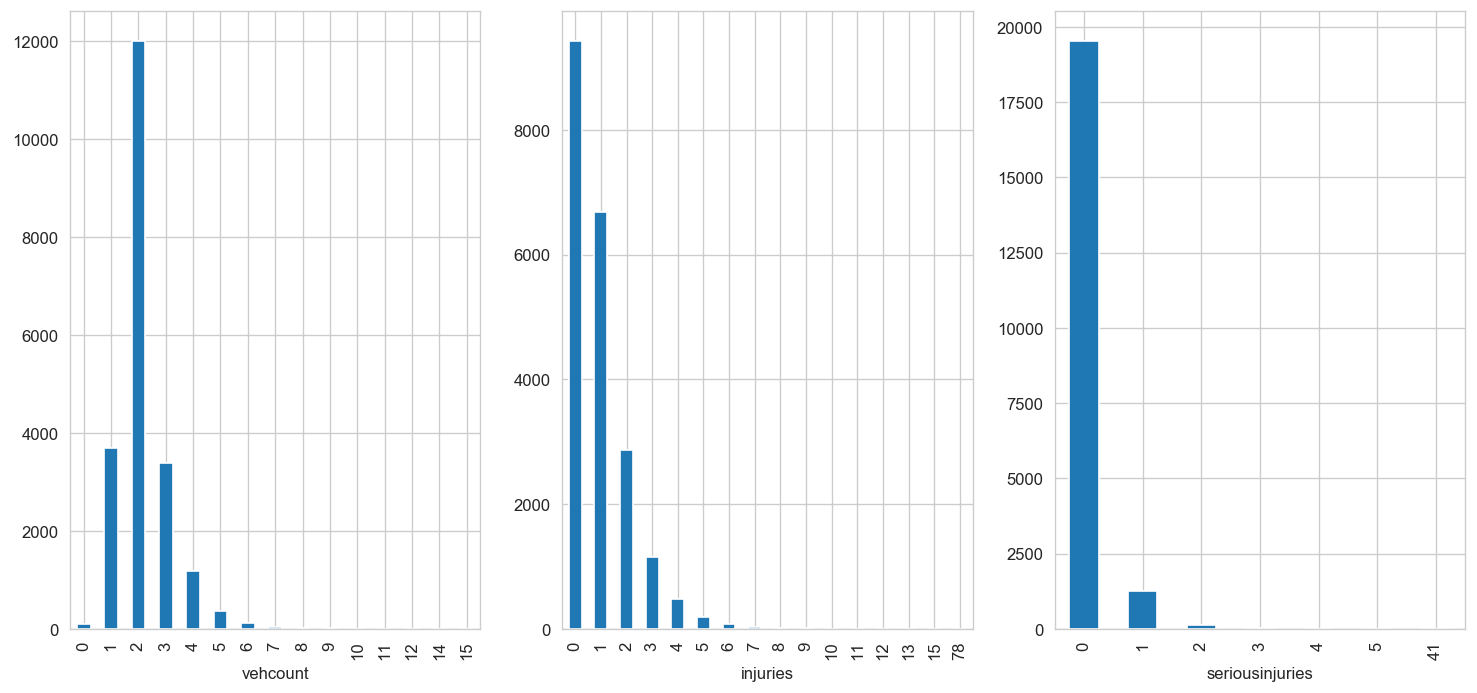

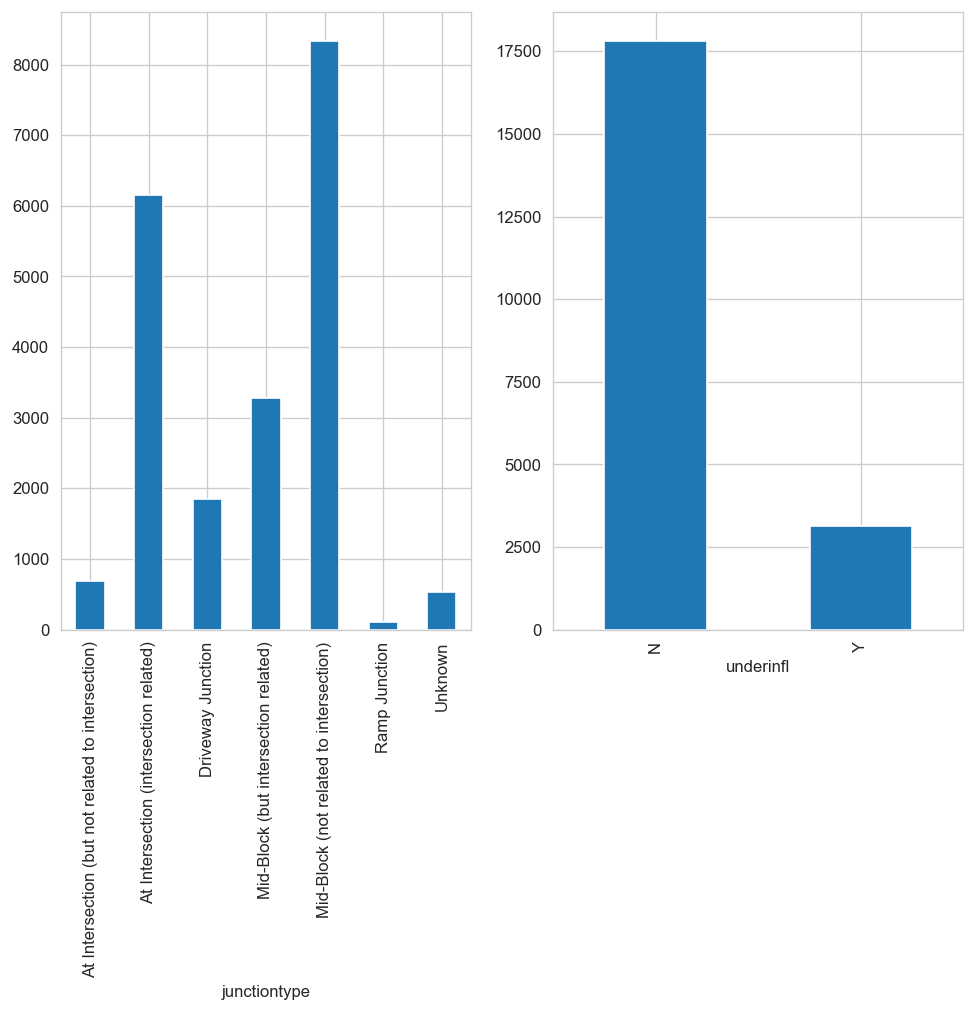

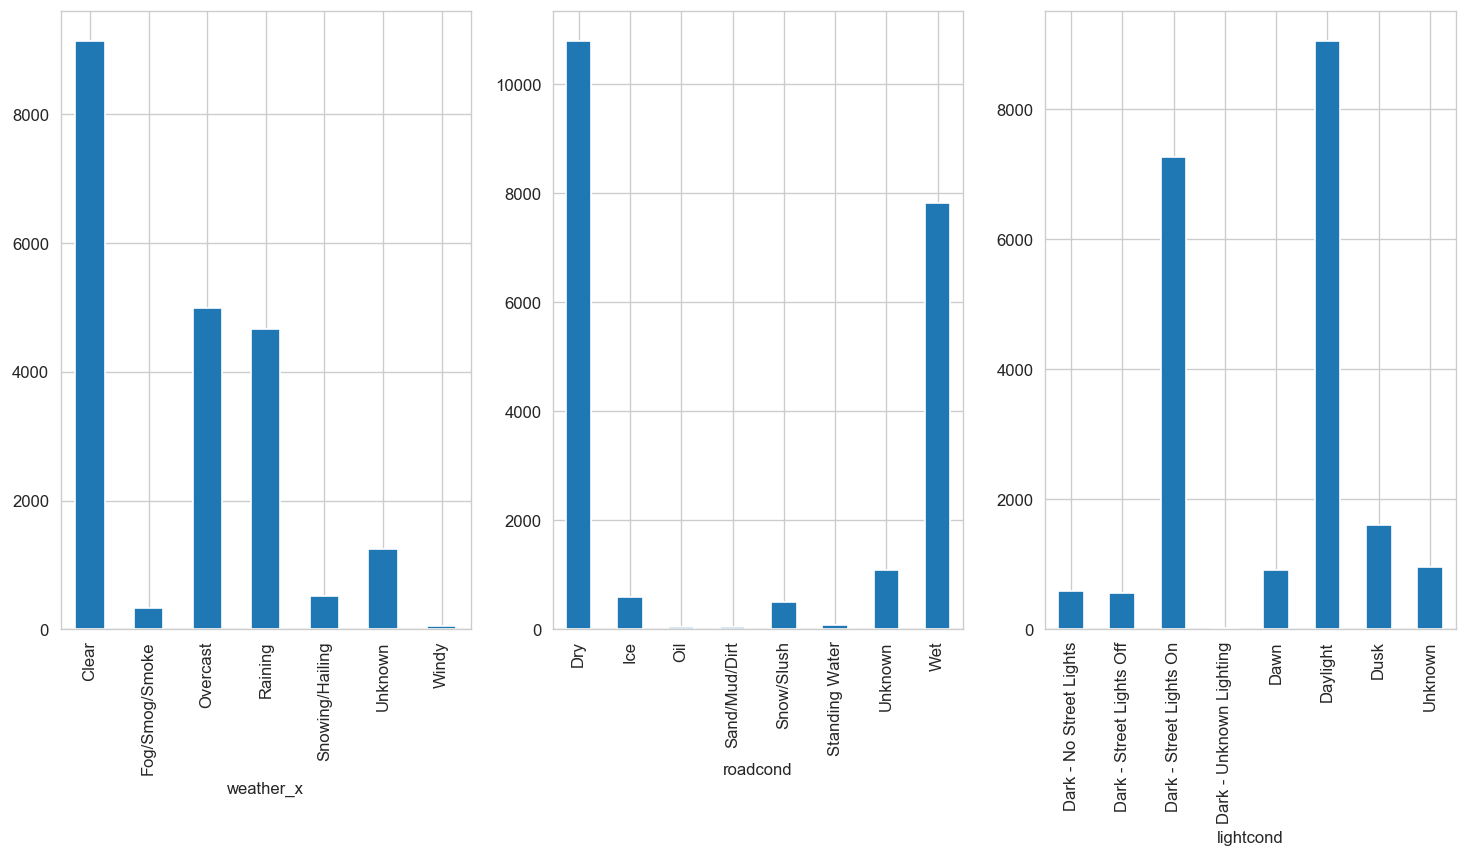

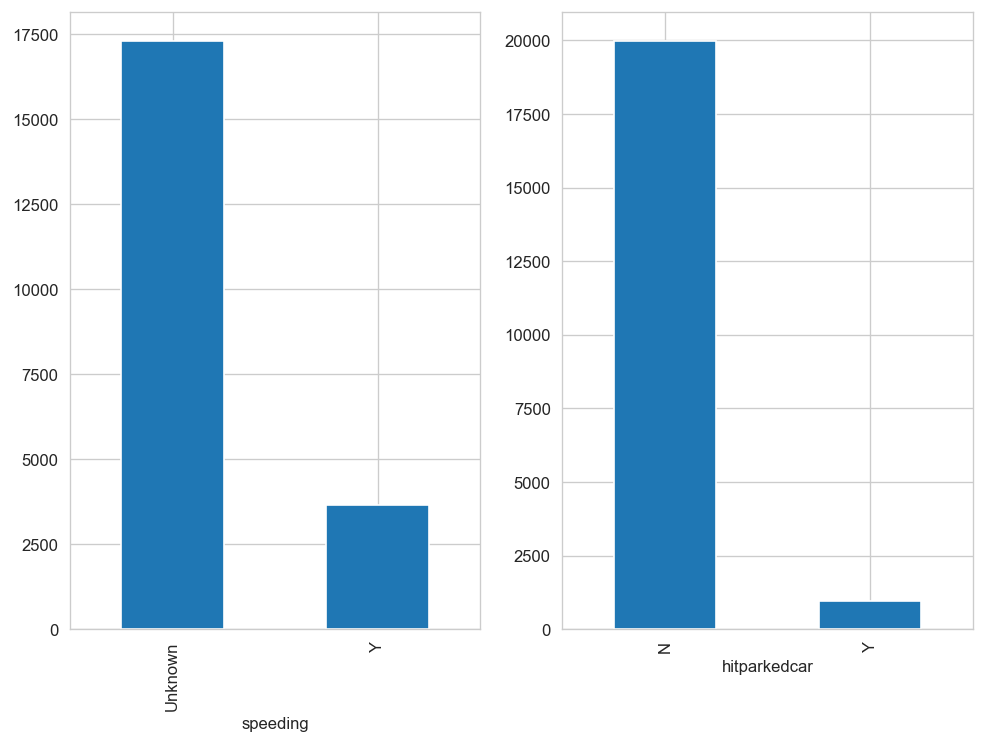

In [420]:
ix = 1
fig = plt.figure(figsize = (15,15))
for c in list(Collision_data_reduced.columns):
    if ix <= 3:
        if c != 'fatalities':
            ax1 = fig.add_subplot(2,3,ix)
            Collision_data_reduced.pivot_table(index=c, aggfunc='size').plot.bar(stacked=True,ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,15))
        ix =1

In [421]:
Collision_data_reduced_discrt = Collision_data_reduced.copy()

In [422]:
from causalnex.discretiser import Discretiser

Collision_data_reduced_discrt["pedcount"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["pedcount"].values)
Collision_data_reduced_discrt["pedcylcount"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["pedcylcount"].values)
Collision_data_reduced_discrt["personcount"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["personcount"].values)
Collision_data_reduced_discrt["vehcount"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["vehcount"].values)
Collision_data_reduced_discrt["injuries"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["injuries"].values)
Collision_data_reduced_discrt["seriousinjuries"] = Discretiser(method="fixed",

                                                               numeric_split_points=[1, 5]).transform(Collision_data_reduced_discrt["seriousinjuries"].values)

In [423]:
pedcount_map = {0: "No-pedcount", 1: "Few-pedcount", 2: "Many-pedcount"}
pedcylcount_map = {0: "No-pedcylcount", 1: "Few-pedcylcount", 2: "Many-pedcylcount"}
personcount_map = {0: "No-personcount", 1: "Few-personcount", 2: "Many-personcount"}
vehcount_map = {0: "No-vehicle", 1: "Few-vehicle", 2: "Many-vehicle"}
injuries_map = {0: "No-injuries", 1: "Few-injuries", 2: "Many-injuries"}
seriousinjuries_map = {0: "No-seriousinjuries", 1: "Few-seriousinjuries", 2: "Many-serious injuries"}


Collision_data_reduced_discrt["pedcount"] = Collision_data_reduced_discrt["pedcount"].map(personcount_map)
Collision_data_reduced_discrt["pedcylcount"] = Collision_data_reduced_discrt["pedcylcount"].map(personcount_map)
Collision_data_reduced_discrt["vehcount"] = Collision_data_reduced_discrt["vehcount"].map(vehcount_map)
Collision_data_reduced_discrt["injuries"] = Collision_data_reduced_discrt["injuries"].map(injuries_map)
Collision_data_reduced_discrt["seriousinjuries"] = Collision_data_reduced_discrt["seriousinjuries"].map(seriousinjuries_map)

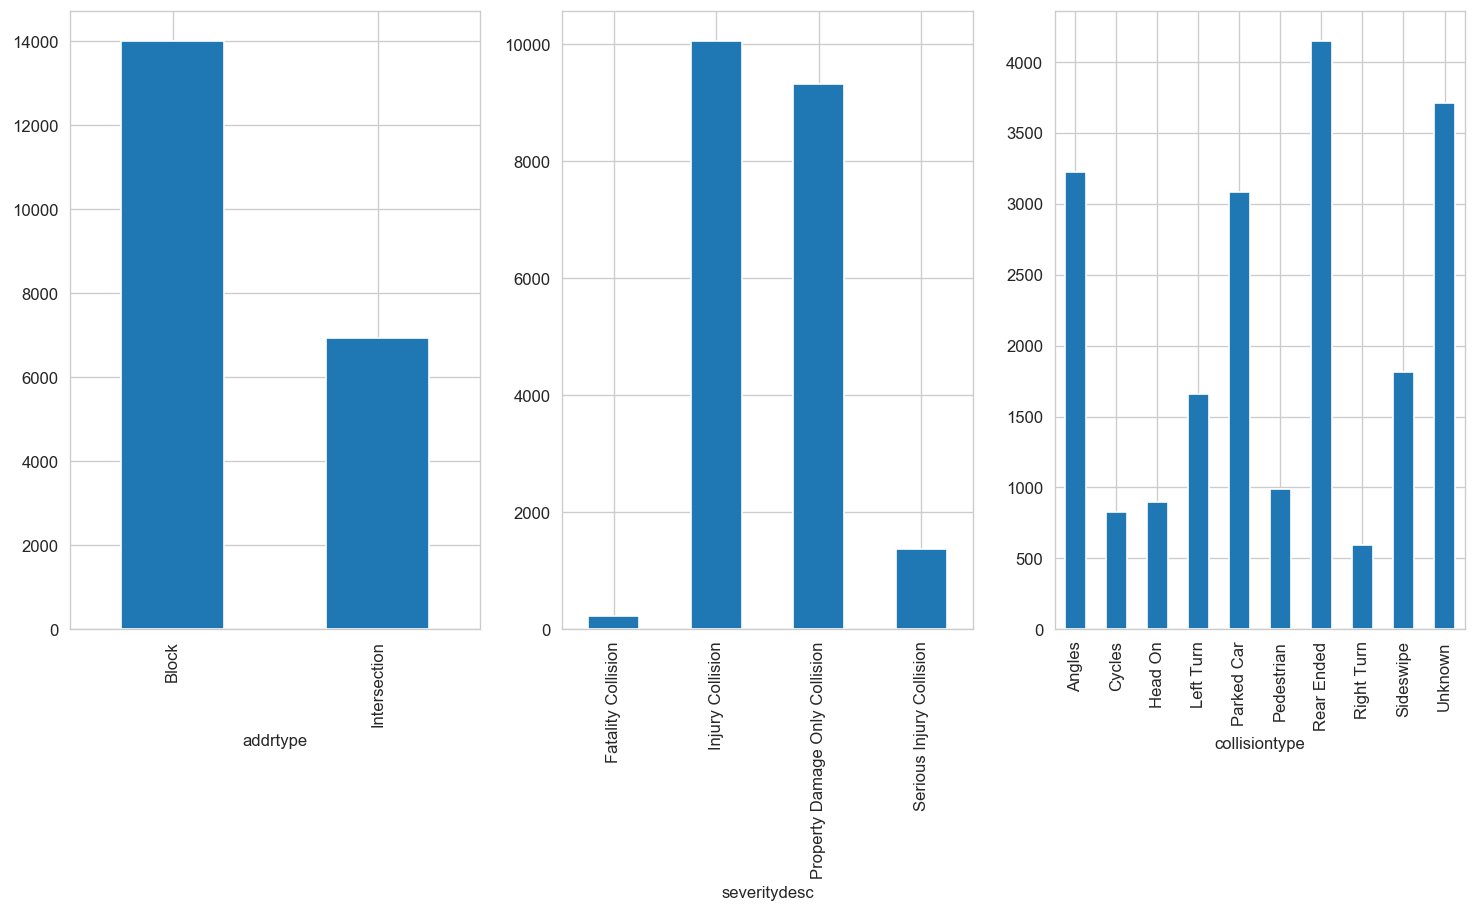

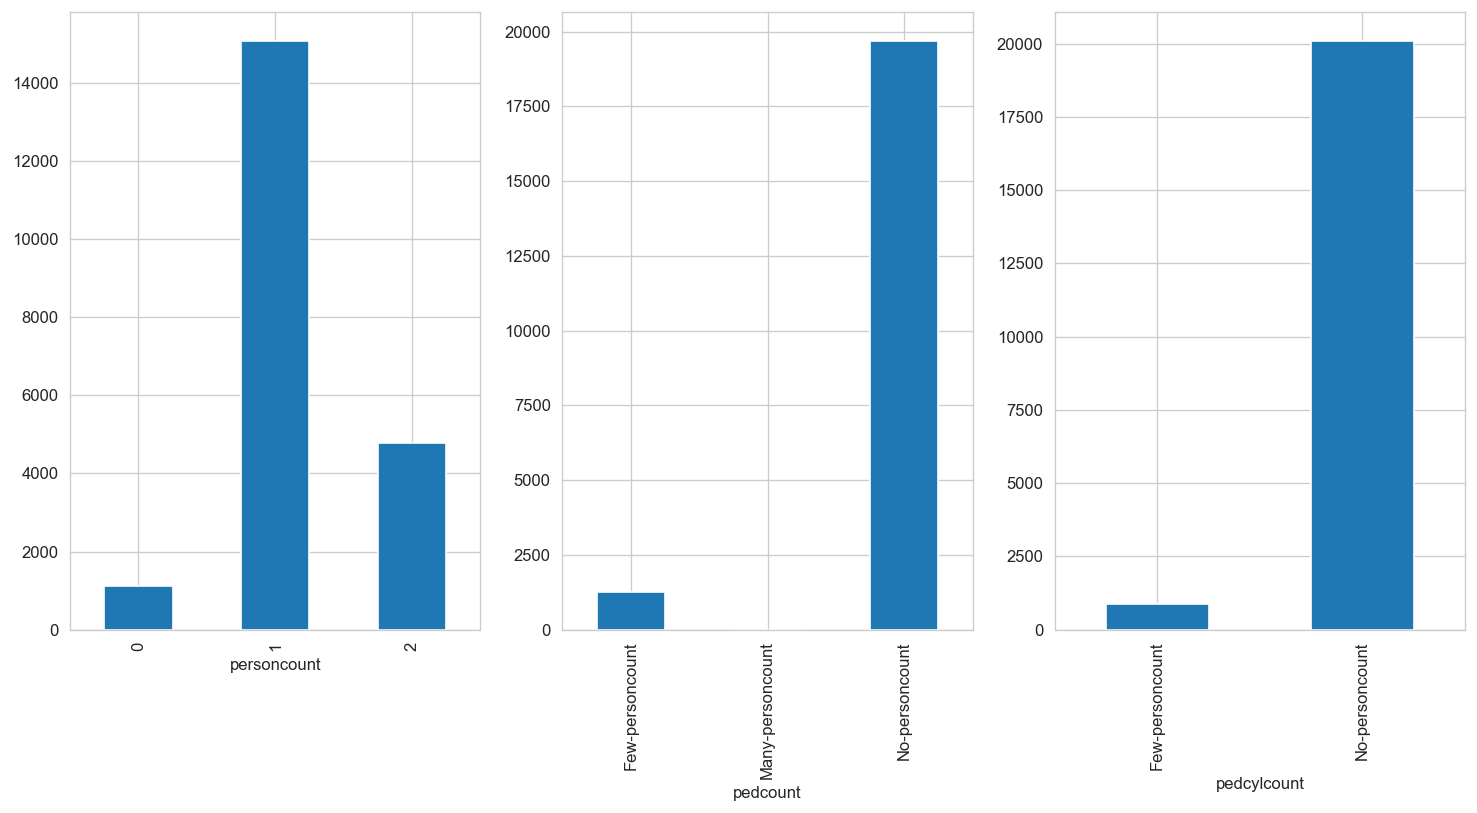

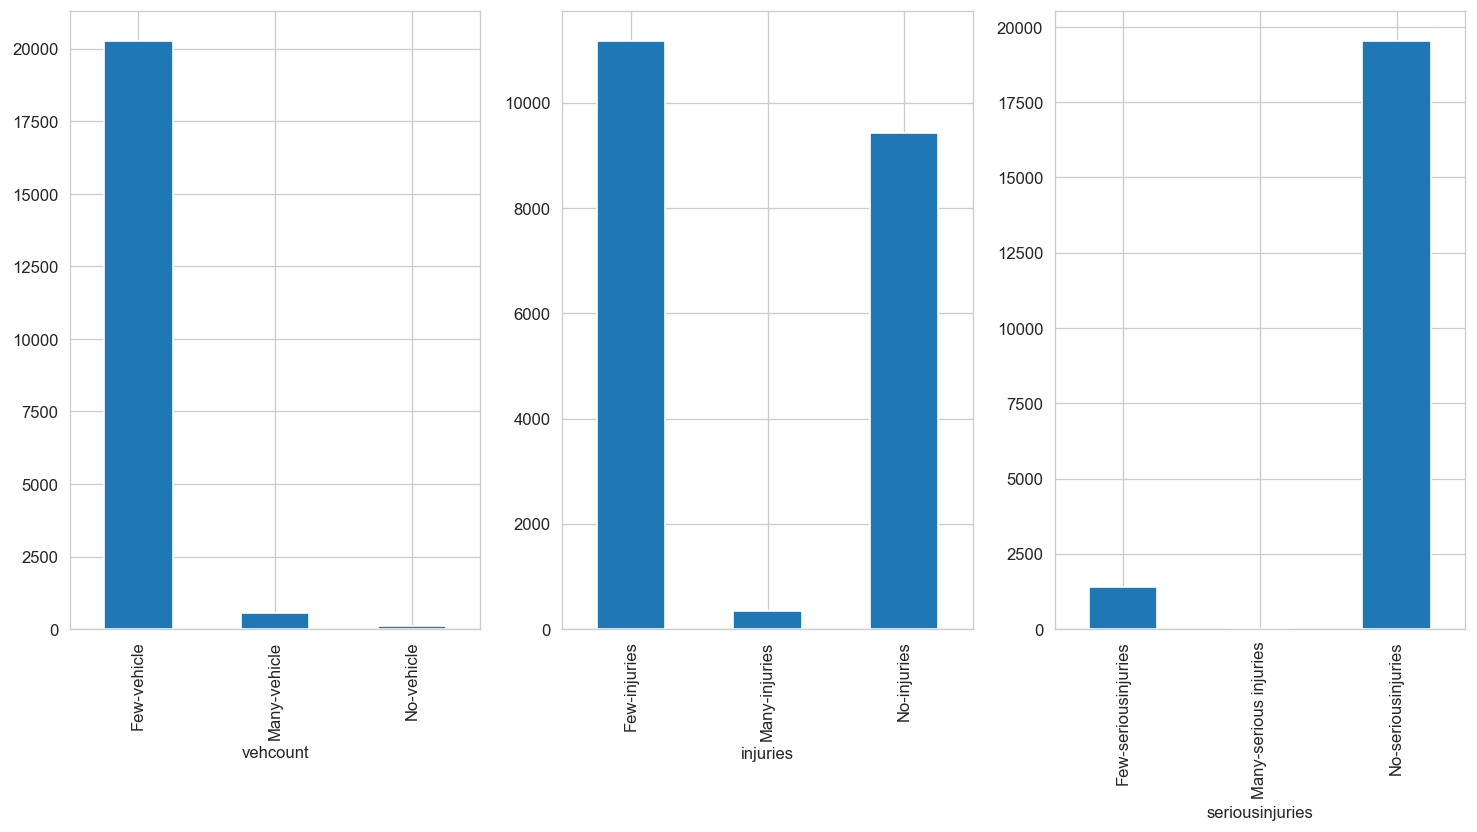

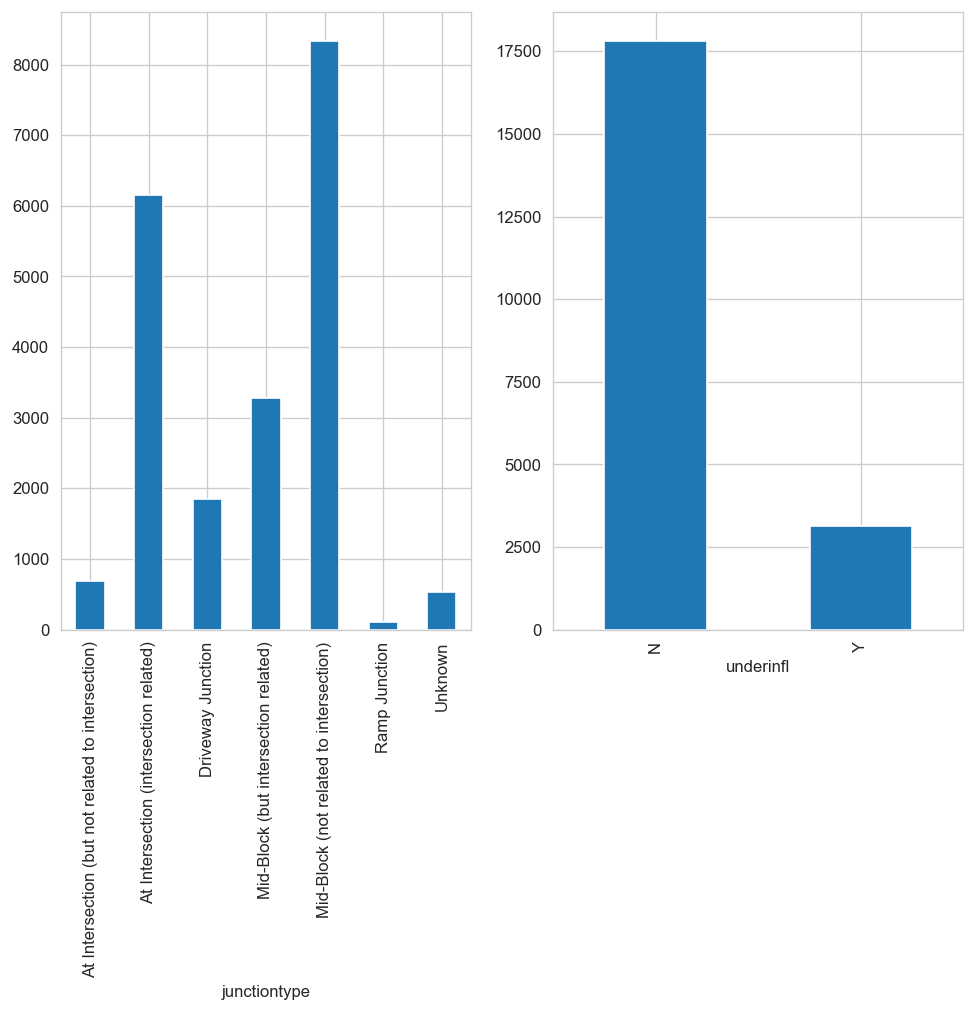

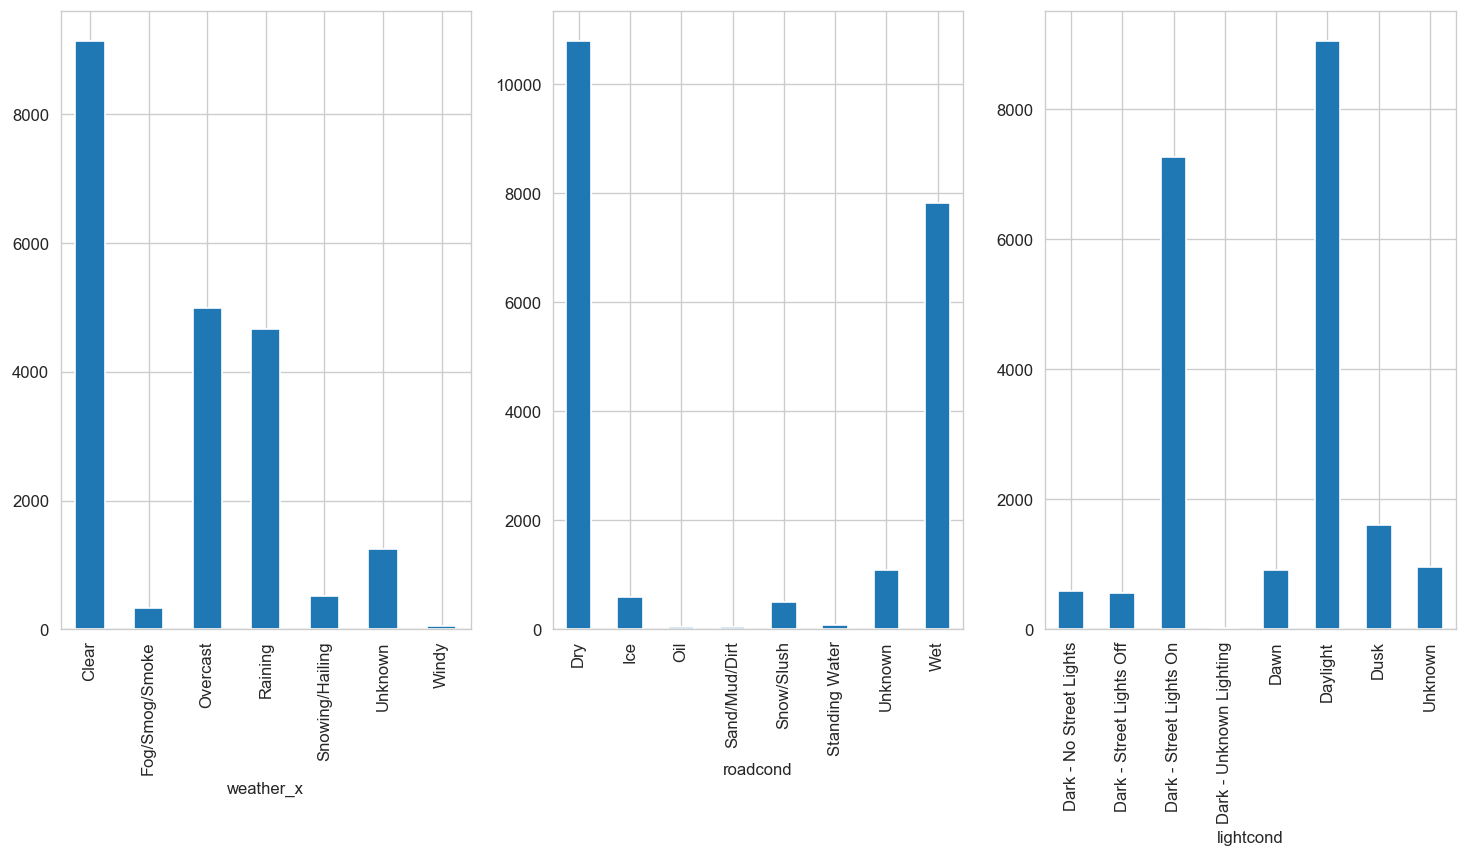

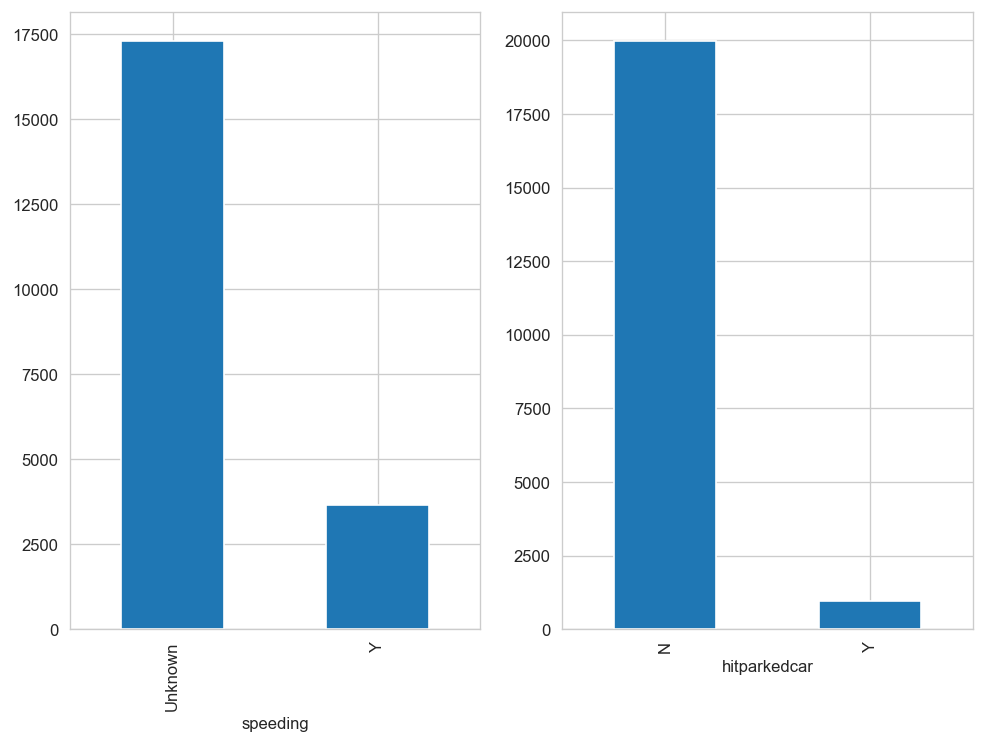

In [424]:
ix = 1
fig = plt.figure(figsize = (15,15))
for c in list(Collision_data_reduced_discrt.columns):
    if ix <= 3:
        if c != 'fatalities':
            ax1 = fig.add_subplot(2,3,ix)
            Collision_data_reduced_discrt.pivot_table(index=c, aggfunc='size').plot.bar(stacked=True,ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,15))
        ix =1

In [425]:
import numpy as np
struct_data = Collision_data_reduced_discrt.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['addrtype', 'severitydesc', 'collisiontype', 'pedcount', 'pedcylcount', 'vehcount', 'injuries', 'seriousinjuries', 'junctiontype', 'underinfl', 'weather_x', 'roadcond', 'lightcond', 'speeding', 'hitparkedcar']


In [426]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,addrtype,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,junctiontype,underinfl,weather_x,roadcond,lightcond,speeding,hitparkedcar
0,1,2,0,1,2,1,0,2,2,0,1,0,3,7,5,0,0
1,1,2,8,1,2,1,0,2,2,0,1,0,2,0,5,0,0
2,0,2,9,1,2,1,0,2,2,0,4,0,2,7,5,0,0
3,0,2,6,1,2,1,0,2,2,0,4,0,3,7,4,1,0
4,0,2,9,1,2,1,0,2,2,0,4,0,3,7,5,1,0


In [427]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

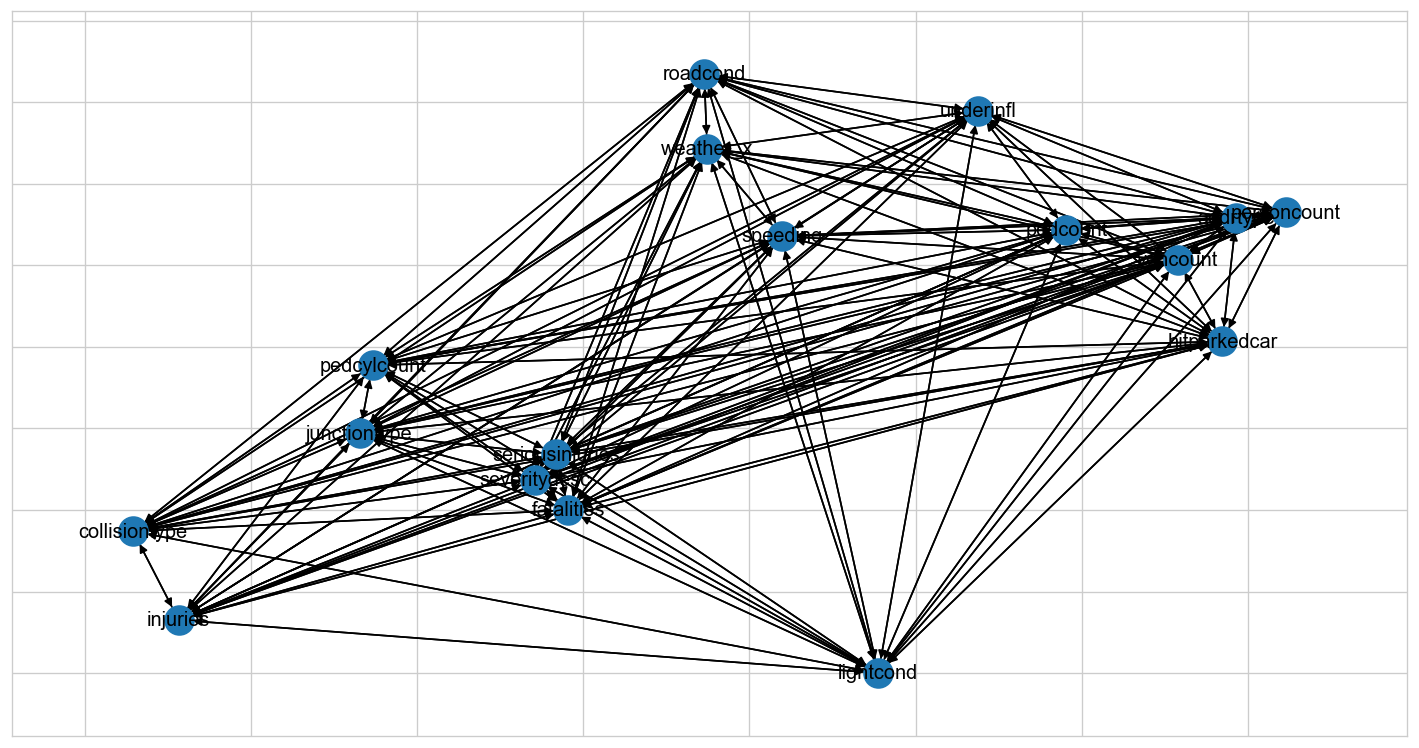

In [428]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(15, 8))  # set figsize
nx.draw_networkx(sm)

In [429]:
sm.remove_edges_below_threshold(.50)

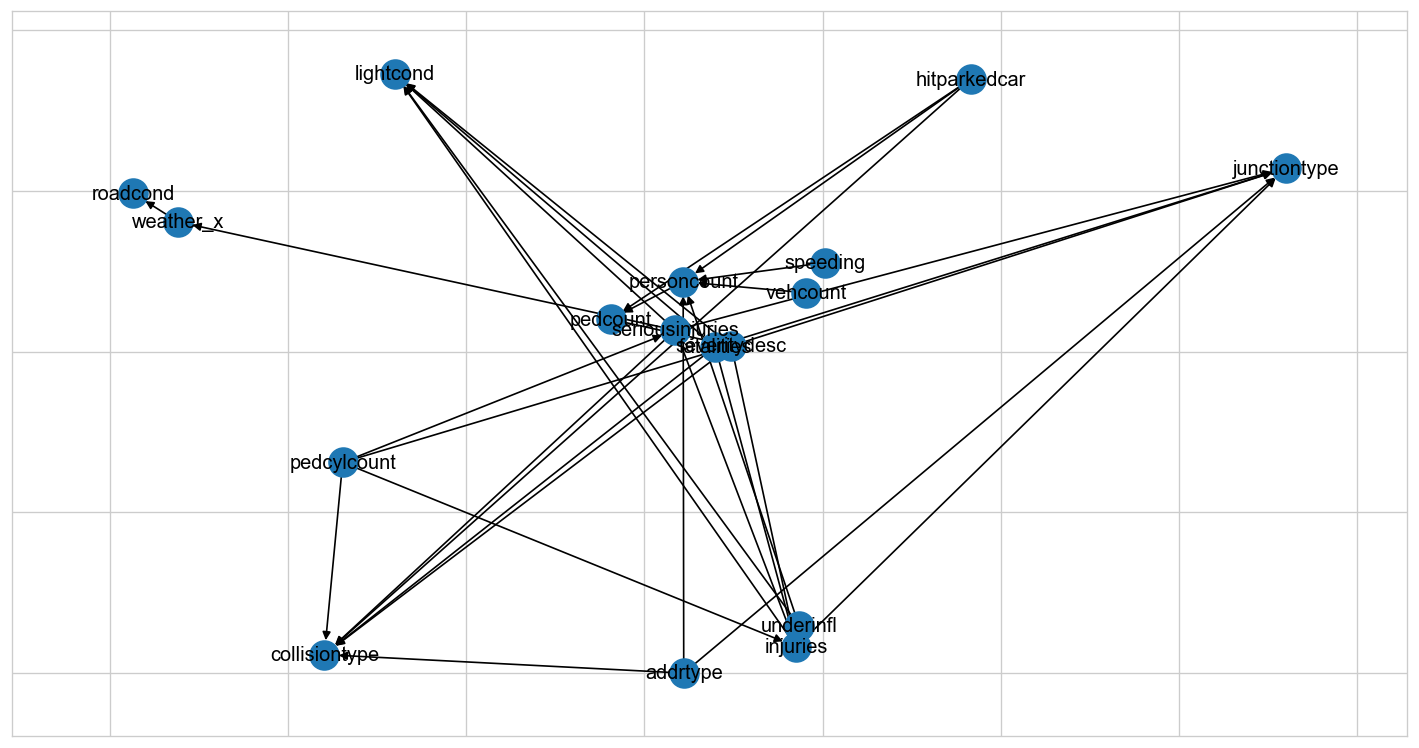

In [430]:
mpl.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(15, 8))  # set figsize
nx.draw_networkx(sm)

In [431]:
#Instantiating a Bayesian Network
from causalnex.network import BayesianNetwork

#getting the largest graph
sm = sm.get_largest_subgraph()
bn = BayesianNetwork(sm)

In [434]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(Collision_data_reduced_discrt, train_size=0.9, test_size=0.1, random_state=7)

In [443]:
bn = bn.fit_node_states(struct_data)

In [444]:
# Learning the conditional probability of all the features in the Bayesian Network
bn = bn.fit_cpds(struct_data, method="BayesianEstimator", bayes_prior="K2")

In [445]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()

{0: 0.39868650392776606, 1: 0.23336772923300486, 2: 0.3679457668392305}

In [467]:
marginals["speeding"]

{0: 0.8261180850556062, 1: 0.17388191494439403}

In [473]:
print("distribution before do", ie.query()["collisiontype"])
ie.do_intervention("speeding",
                   {0: 0.0,
                    1: 1.0})
print("distribution after do", ie.query()["collisiontype"])

distribution before do {0: 0.09290352151182144, 1: 0.07858357983335593, 2: 0.08480712497617246, 3: 0.07958198856457051, 4: 0.1269855652726133, 5: 0.07950018022314531, 6: 0.1487862610388709, 7: 0.07397282769319487, 8: 0.09873697108630736, 9: 0.13614197979995002}
distribution after do {0: 0.09290352151182142, 1: 0.07858357983335591, 2: 0.08480712497617246, 3: 0.07958198856457051, 4: 0.12698556527261326, 5: 0.0795001802231453, 6: 0.1487862610388709, 7: 0.07397282769319487, 8: 0.09873697108630734, 9: 0.13614197979995}


In [474]:
ie.reset_do("speeding")

In [456]:
print("distribution before do", ie.query()["severitydesc"])
ie.do_intervention("addrtype",
                   {0: 1.0,
                    1: 0.0})
print("distribution after do", ie.query()["severitydesc"])

distribution before do {0: 0.010284839093865145, 1: 0.4804332515963904, 2: 0.4433022826190602, 3: 0.06597962669067751}
distribution after do {0: 0.010284839093865145, 1: 0.4804332515963904, 2: 0.44330228261906035, 3: 0.06597962669067751}


In [478]:
marginals["underinfl"]

{0: 0.8498401030976718, 1: 0.15015989690229303}

In [484]:
print("distribution before do", ie.query()["injuries"])
ie.do_intervention("underinfl",
                   {0: 0.0,
                    1: 1.0})
print("distribution after do", ie.query()["injuries"])

distribution before do {0: 0.39885259343847845, 1: 0.23339960420768255, 2: 0.36774780235382815}
distribution after do {0: 0.39885259343847845, 1: 0.23339960420768255, 2: 0.36774780235382815}
